In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataframe=pd.read_csv('Zomato_data.csv')

In [8]:
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
# Convert the rate column to a float by removing denominator characters.
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [12]:
dataframe.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [13]:
dataframe.isna()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


Text(0.5, 0, 'Type of restaraunt')

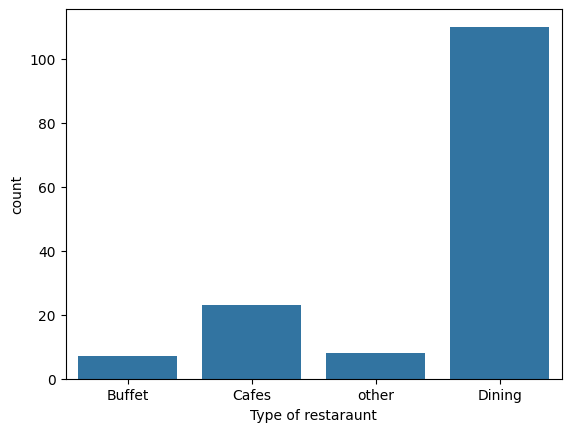

In [14]:
# see the listed_in (type) column to identify popular restaurant categories.
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaraunt")

The majority of the restaurants fall into the dining category.

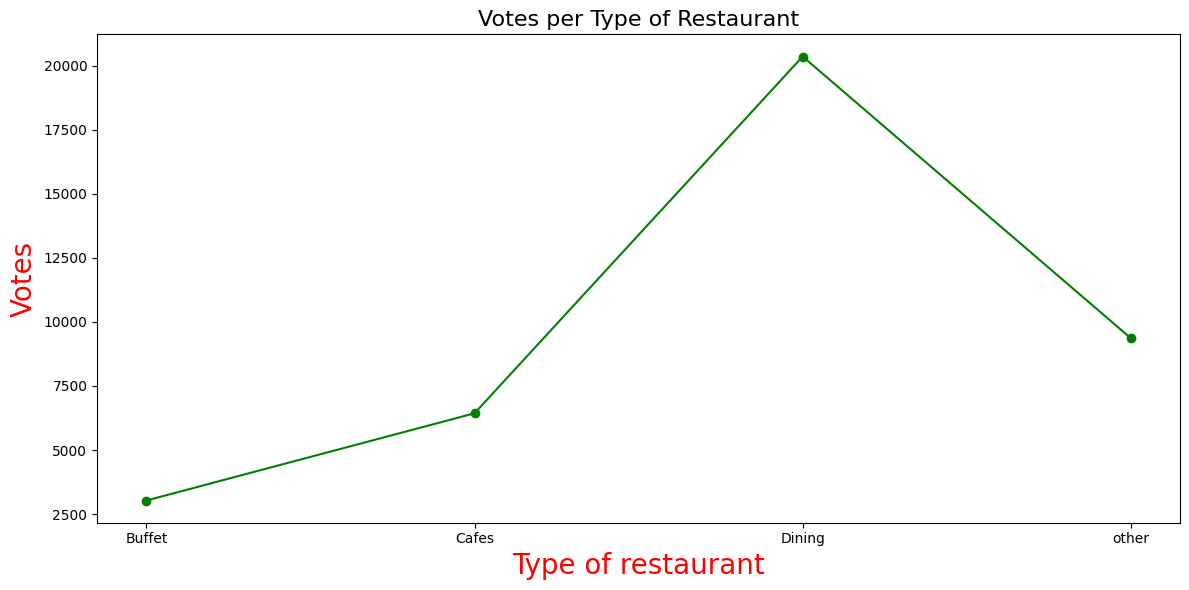

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataframe' is already defined
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()

# Convert the Series to DataFrame and reset the index for plotting if needed
result = pd.DataFrame({'Type of restaurant': grouped_data.index, 'votes': grouped_data.values})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(result['Type of restaurant'], result['votes'], c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

plt.title('Votes per Type of Restaurant', size=16)
plt.tight_layout()
plt.show()


Dining restaurants are preferred by a larger number of individuals.

In [20]:
# Identify the Most Voted Restaurant
max_votes=dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

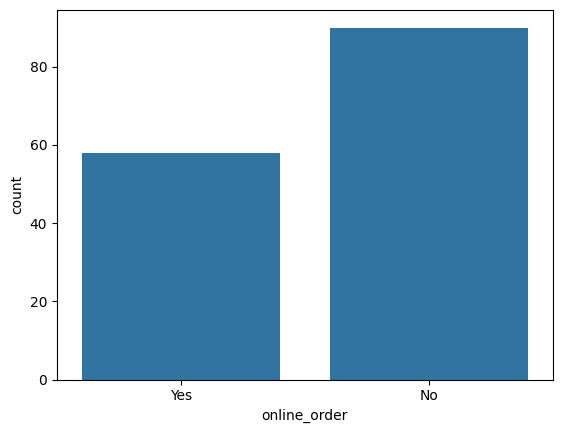

In [21]:
# Online Order Availability
sns.countplot(x=dataframe['online_order'])

This suggests that a majority of the restaurants do not accept online orders.

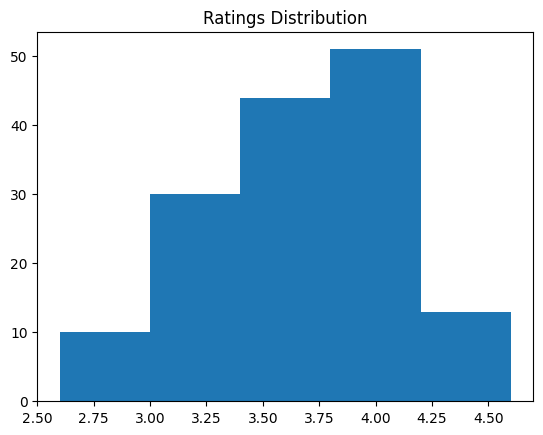

In [23]:
# Analyze Ratings
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

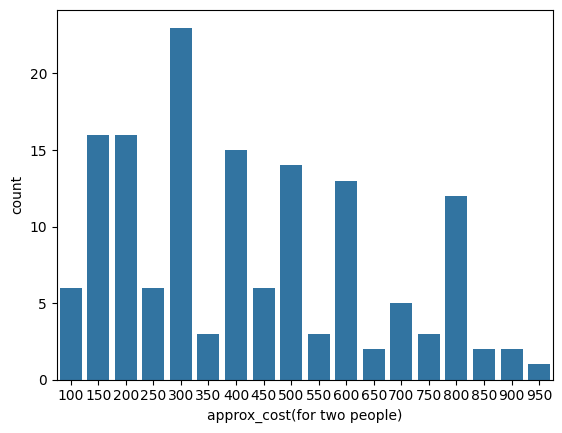

In [24]:
# Approximate Cost for Couples
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

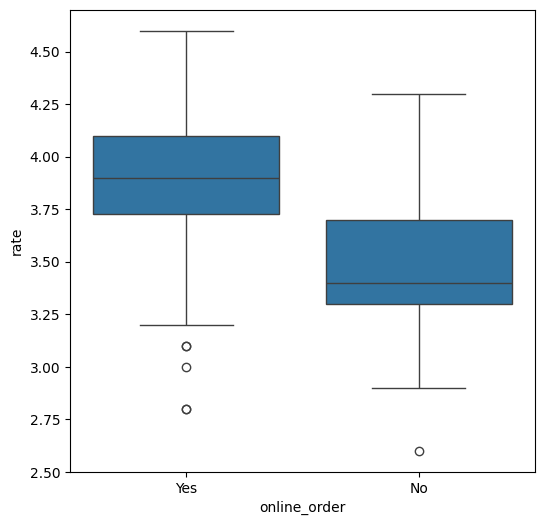

In [25]:
# Ratings Comparison - Online vs Offline Orders
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)

Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

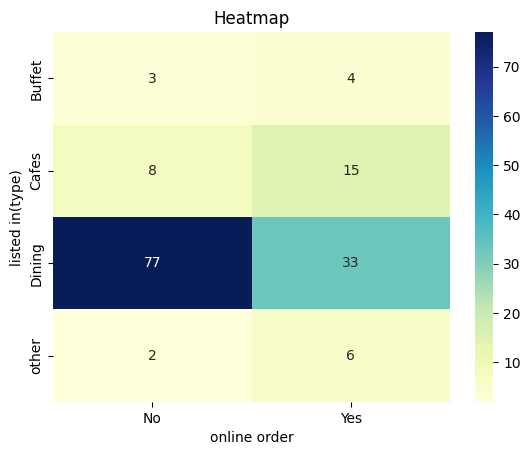

In [29]:
# Order Mode Preferences by Restaurant Type
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('listed in(type)')
plt.show()

Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. 
This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.